In [20]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from cycler import cycler

In [22]:
df = pd.read_csv('cleanData.csv')

In [23]:
# Splitting Year and Month from the lastUpdated column
df['Year'] = pd.DatetimeIndex(df['lastUpdated']).year 
df['Month'] = pd.DatetimeIndex(df['lastUpdated']).month
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'])
df['rating'].fillna(df['rating'].mean(), inplace = True)
df['rating'] = df['rating'].round(1)

In [24]:
# Converting number into months
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df

,app,category,rating,reviews,size,installs,price,rated,lastUpdated,osVer,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0.0,Everyone,2018-07-01,4.0.3 and up,2018,Jul
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0.0,Everyone,2018-01-15,4.0.3 and up,2018,Jan
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0.0,Everyone,2018-01-08,4.0.3 and up,2018,Jan
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0.0,Teen,2018-08-06,4.2 and up,2018,Aug
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0.0,Everyone,2018-06-20,4.4 and up,2018,Jun
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,0.0,Everyone,2017-03-26,2.3 and up,2017,Mar
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,0.0,Everyone,2018-04-26,4.0.3 and up,2018,Apr
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,0.0,Everyone,2018-06-14,4.2 and up,2018,Jun
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,0.0,Everyone,2017-09-20,3.0 and up,2017,Sep
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,0.0,Everyone,2018-03-07,4.0.3 and up,2018,Mar


In [5]:
# Split dataframe where rated is 'Everyone'
everyone_rated_df = df.copy()[df['rated']=='Everyone']
everyone_rated = df.copy()[df['rated']=='Everyone']
everyone_rated_df.set_index('Year', inplace = True)
everyone_rated_df.sort_index(inplace=True)
everyone_rated.sort_index(inplace=True)

In [6]:
# # Applications(Everyone), whose price is more than
# fig1_x = pd.DataFrame(everyone_rated_df[everyone_rated_df['price'] > 1])
# fig1_x = fig1_x[['rating', 'category']]

# # fig1 = fig1_x.plot(title='Applications(Everyone), whose price is more than 1', linestyle='-', markevery=100, marker='o', markerfacecolor='black')
# # fig1.set_xlabel('Year (App got updated)')
# # fig1.set_ylabel('Price in USD')
# # fig1.set_ylim(2, None)

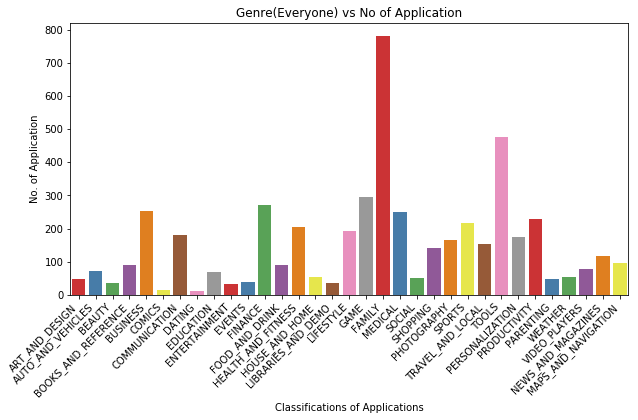

In [7]:
# Char # 1

plt.figure(figsize=(10,5))
chart1 = sns.countplot(
    data=everyone_rated[everyone_rated['Year'] == 2018],
    x='category',
    palette='Set1'
)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Classifications of Applications')
plt.ylabel('No. of Application')
plt.title("Genre(Everyone) vs No of Application")
fig_1 = chart1.get_figure()
fig_1.savefig("output_1.png", dpi=300, bbox_inches = "tight")
#plt.savefig("image.png",bbox_inches='tight',dpi=100)

<Figure size 1296x720 with 0 Axes>

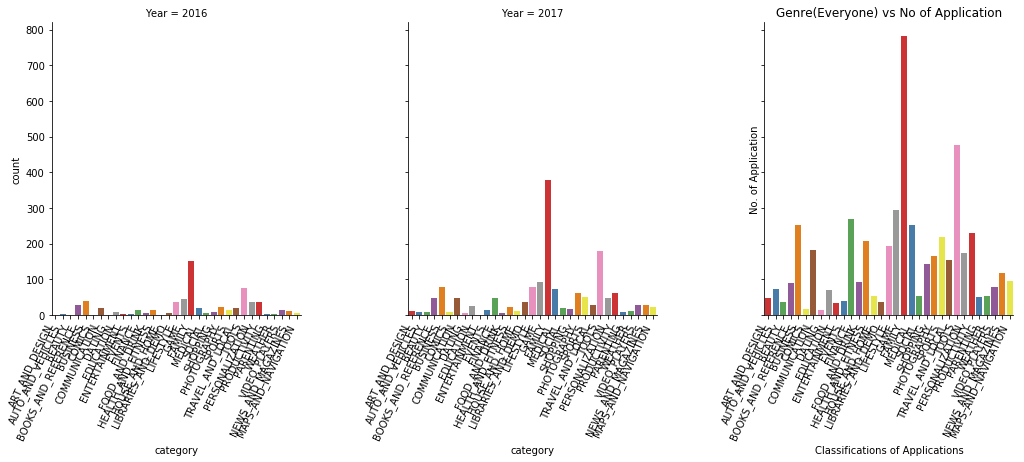

In [51]:
# Cat Plot
plt.figure(figsize=(18,10))
chart2 = sns.catplot(
    data=everyone_rated[everyone_rated['Year'].isin(np.arange(2016, 2019, 1))],
    x='category',
    kind = 'count',
    palette='Set1',
    col='Year',
    aspect=1,
)
chart2.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel('Classifications of Applications')
plt.ylabel('No. of Application')
plt.title("Genre(Everyone) vs No of Application")
chart2.savefig("output_2.png", dpi=300, bbox_inches = "tight")

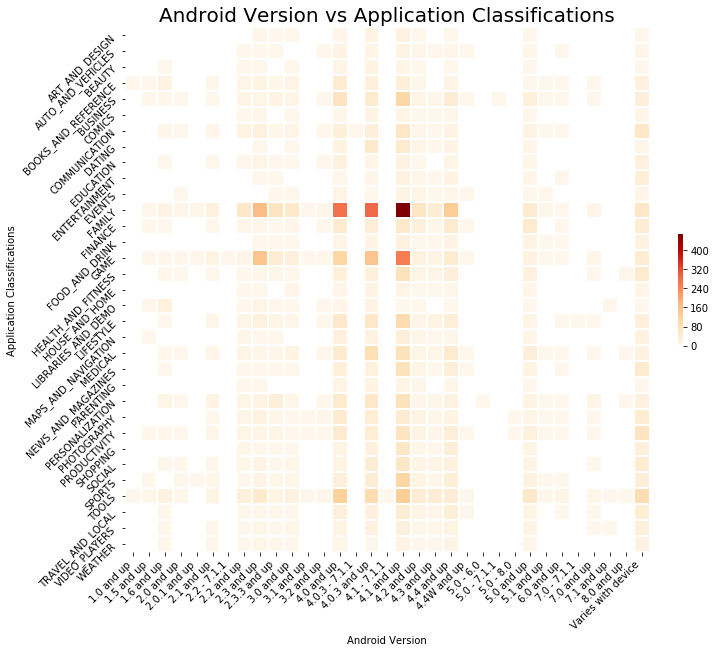

In [9]:
# Heatmap Os Version vs Category
# Application from Family category support highest number of the devices
by_category = (df
            .groupby('category')
            .filter(lambda x : len(x) > 0)
            .groupby(['category', 'osVer'])
            .size()
            .unstack()
           )
plt.figure(figsize=(10,10))
chart3 = sns.heatmap(
    by_category, 
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=1
)

chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45, horizontalalignment='right')
chart3.set_yticklabels(chart3.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Android Version')
plt.ylabel('Application Classifications')
plt.title('Android Version vs Application Classifications', fontsize = 20)
plt.subplots_adjust(top=0.9)
fig_3 = chart3.get_figure()
fig_3.savefig("output_3.png", dpi=300, bbox_inches = "tight")

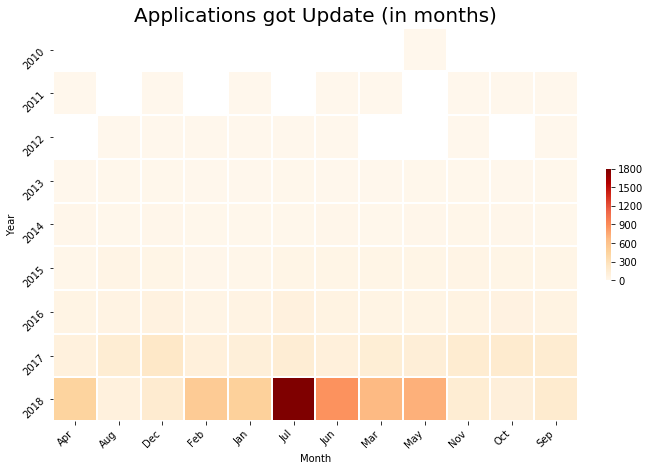

In [10]:
# Heatmap Applications got Update (in months)

by_category = (df
            .groupby('Year')
            .filter(lambda x : len(x) > 0)
            .groupby(['Year', 'Month'])
            .size()
            .unstack()
           )
plt.figure(figsize=(10,10))
chart4 = sns.heatmap(
    by_category, 
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=1
)

chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45, horizontalalignment='right')
chart4.set_yticklabels(chart4.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Applications got Update (in months)', fontsize = 20)
plt.subplots_adjust(top=0.9)
fig_4 = chart4.get_figure()
fig_4.savefig("output_4.png", dpi=300, bbox_inches = "tight")

<Figure size 2520x1080 with 0 Axes>

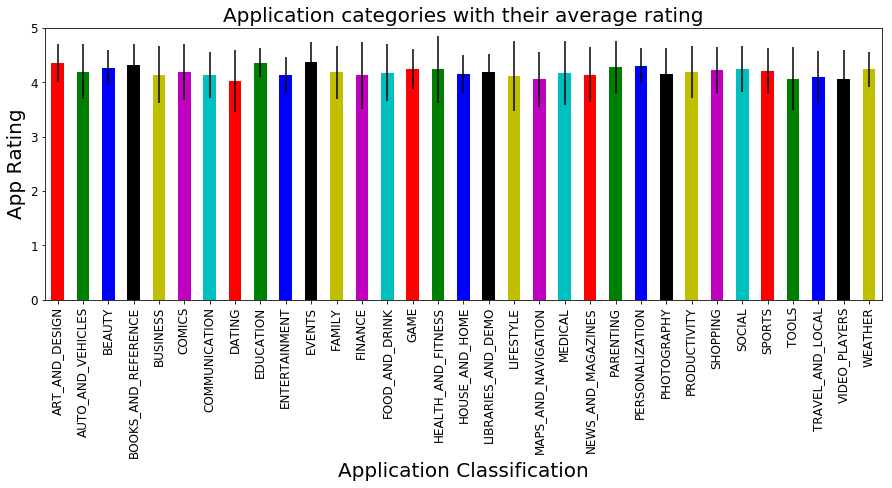

In [61]:
# Mean and standard deviation plot
byCategory = df.groupby('category')
plt.figure(figsize=(35,15))
std = byCategory.std()
std = pd.DataFrame(std[['rating']])
avg = byCategory.mean()
avg = pd.DataFrame(avg[['rating']])
my_colors = 'rgbkymc'
chart5 = avg.plot(figsize=(15,5),legend=False,kind="bar",rot=90,color=my_colors,fontsize=12,yerr=std)
chart5.set_title("Application categories with their average rating", fontsize=20)
chart5.set_xlabel("Application Classification", fontsize=20)
chart5.set_ylabel("App Rating", fontsize=20)
chart5.set_ylim(0,5)
fig_5 = chart5.get_figure()
fig_5.savefig("output.png", dpi=300, bbox_inches = "tight")

In [12]:
avg1 = pd.concat([avg, std], axis = 1, sort = True)
#avg.columns = ['average', 'Std. Deviation']

In [13]:
avg1.columns = ['average', 'std_deviation']

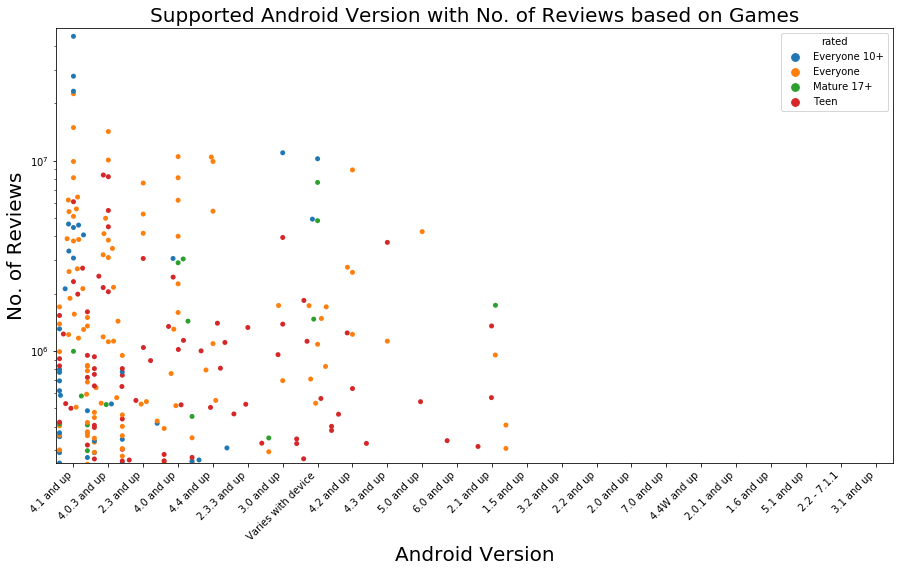

In [14]:
# 'Supported Android Version with No. of Reviews based on Games
game_data = byCategory.get_group('GAME')

plt.figure(figsize=(15,8))
chart6 = sns.swarmplot(data=game_data, x='osVer', y='reviews', hue='rated')
#chart6.legend_.remove()
plt.margins(0.02)
plt.title('Supported Android Version with No. of Reviews based on Games', fontsize = 20)
plt.xlabel('Android Version', fontsize = 20)
plt.ylabel('No. of Reviews', fontsize = 20)
# plt.ylim(0, None)
chart6.set_yscale('log')
chart6.set_xticklabels(chart6.get_xticklabels(), rotation=45, horizontalalignment='right')
fig_6 = chart6.get_figure()
fig_6.savefig("output_6.png", dpi=300, bbox_inches = "tight")

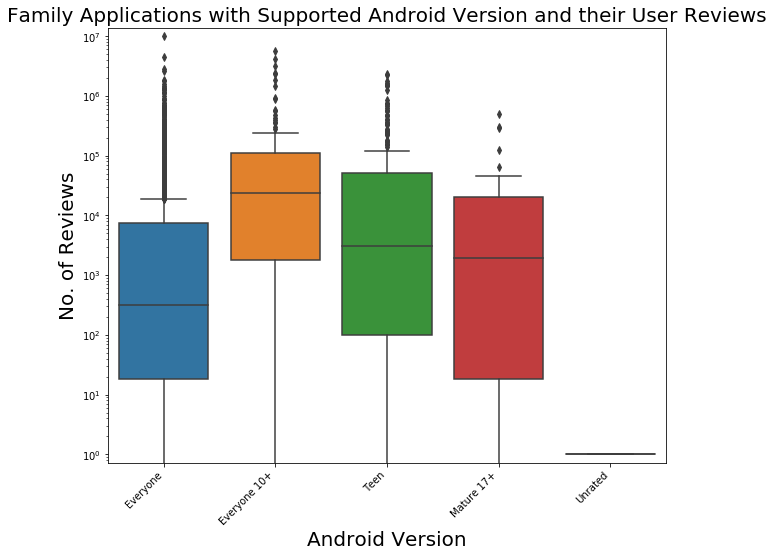

In [58]:
# Box Plot Family Applications with Supported Android Version and their User Reviews

family_data = byCategory.get_group('FAMILY')
plt.figure(figsize=(10,8))
chart7 = sns.boxplot(data=family_data, x='rated', y='reviews')
#chart7 = sns.boxplot(data=family_data, x='osVer', y='reviews', hue='rated')
plt.margins(0.02)
plt.title('Family Applications with Supported Android Version and their User Reviews', fontsize = 20)
plt.xlabel('Android Version', fontsize = 20)
plt.ylabel('No. of Reviews', fontsize = 20)
chart7.set_yscale('log')
chart7.set_xticklabels(chart7.get_xticklabels(), rotation=45, horizontalalignment='right')
fig_7 = chart7.get_figure()
fig_7.savefig("output_7.png", dpi=300, bbox_inches="tight")

In [16]:
# Pie Chart
from math import pi
import pandas as pd
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
import operator

bycategory_count = byCategory.count()
bycategory_count_sr = bycategory_count.iloc[:,0]

categories={}
count=0

for index, row in bycategory_count_sr.items():
    categories[index] = row
    
       
categories = sorted(categories.items(), key=operator.itemgetter(1), reverse=True)

top_categories={}
for item, element in categories:
    if (count < 20):
        top_categories[item] = element
        count += 1
##################################################################

output_file("./pie.html")

x = top_categories

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(plot_height=600, plot_width = 800, title="Top 20 Application Categories Based on Application Number", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None




In [17]:
#family_data['reviews'] = family_data['reviews'].div(1000)

In [18]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [56]:
from bokeh.layouts import column
from bokeh.plotting import figure, show, output_file
from bokeh.transform import jitter

ratings = sorted(df.rating.unique())

# p1 = figure(plot_width=600, plot_height=300, title="Years vs mpg without jittering")
# p1.xgrid.grid_line_color = None
# p1.xaxis[0].ticker = years
# p1.circle(x='Year'#, y='installs', size=9, alpha=0.4, source=df)
#p2 = figure(plot_width=600, plot_height=300, title="Years vs mpg with jittering")

p2 = figure(plot_width = 1600, plot_height= 800, title="Application Rating Vs No. of Installations", y_axis_type='log')
p2.xgrid.grid_line_color = None
p2.xaxis[0].ticker = ratings
p2.circle(x=jitter('rating', 0.4), y='installs', size=9, alpha=0.4, source=df)
p2.xaxis.axis_label = 'Ratings'
p2.yaxis.axis_label = 'No. of Installations'
output_file("jitter.html")

show(column(p2))

In [53]:
# ndf = df[['installs', 'rating']].copy()
# ndf.groupby(['rating'])['installs'].nunique()

In [54]:
# ndf[ndf['rating'] == 1]

In [55]:
# df[df['rating'] == 1]